In [3]:
import pandas as pd
import numpy as np 
df = pd.read_csv('data/zippedData/rotten_tomatoes_critic_reviews.csv.gz')
df

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [4]:
import sqlite3 


conn = sqlite3.Connection('data/movies.db')
cur = conn.cursor()

In [5]:
cur.execute('''
            Select genres and primary_title
            From imdb_title_basics
            ''')
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df

OperationalError: no such table: imdb_title_basics

In [7]:
df1= pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
df2= pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [11]:
df1 = df1.set_index("movie")


In [12]:
df2 = df2.set_index('primary_title')


In [13]:
df2.drop('Unnamed: 0', axis = 1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

In [14]:
df1.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)

KeyError: "['Unnamed: 0' 'Unnamed: 0.1'] not found in axis"

In [15]:
df3=df2.join(df1,on = "primary_title", how= "inner")
df3

,tconst,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
primary_title,,,,,,,,,,
Foodfight!,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
Mortal Kombat,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227"
The Overnight,tt0326592,The Overnight,2010,88.0,NaN,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
The Overnight,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
On the Road,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...
Fuel,tt9678962,Fuel,2018,NaN,"Documentary,Sport",35,"Nov 14, 2008","$2,500,000","$174,255","$174,255"
Diner,tt9729206,Diner,2019,NaN,Crime,11,"Apr 2, 1982","$5,000,000","$12,592,907","$12,592,907"
Traitor,tt9805168,Traitor,2015,110.0,"Action,Drama,Romance",25,"Aug 27, 2008","$22,000,000","$23,530,831","$27,882,226"


In [16]:
df3.sort_values("profit_as_percentage", ascending = False).head(25)

KeyError: 'profit_as_percentage'

In [17]:
profit_as_percentage = df3["profit_as_percentage"]

KeyError: 'profit_as_percentage'

In [48]:
genres = df3["genres"]

In [60]:
profit = df3['profit']

In [54]:
runtime_minutes = df3["runtime_minutes"]

In [52]:
correlation = profit_as_percentage.corr(runtime_minutes)
print(correlation)

-0.058269353667834825


# No correlation between profit % and Runtime 

In [58]:
correlation = runtime_minutes.corr(profit)
print(correlation)

1.0


In [57]:
df.to_csv(path_or_buf="movie_budgets_and_title_basics_merged.csv")

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [18]:
data = pd.read_csv('data/zippedData/movie_budgets_and_title_basics_merged.csv.gz')
x = df3["profit"]
y = df3['runtime_minutes']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Correlation between runtime and profit')
plt.xlabel('runtime_minutes')
plt.ylabel('profit')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/zippedData/movie_budgets_and_title_basics_merged.csv.gz'

[[1.         0.13134837]
 [0.13134837 1.        ]]


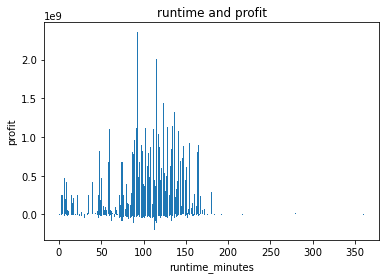

In [69]:
data = pd.read_csv('data/movie_budgets_and_title_basics_merged.csv')
y = df3["profit"]
x = df3['runtime_minutes']

print(np.corrcoef(x, y))

plt.bar(x, y) 
plt.title('runtime and profit')
plt.xlabel('runtime_minutes')
plt.ylabel('profit')

plt.show()

# Highest profit is at 90 minutes and 120 minutes

In [73]:
most_common_genre = df3['genres'].value_counts().head(10)

In [79]:
df4 = df3.groupby ("genres")["profit_as_percentage"].mean()
df4

genres
Action                        167.547170
Action,Adventure              358.139374
Action,Adventure,Animation    310.098117
Action,Adventure,Biography    147.584996
Action,Adventure,Comedy       301.540550
                                 ...    
Sci-Fi,Thriller               312.259323
Sport                         -35.016841
Thriller                      318.876397
War                           230.013121
Western                        46.501758
Name: profit_as_percentage, Length: 326, dtype: float64

In [97]:
df4.sort_values( ascending = False).head(10)


genres
Animation,Family           12327.788038
Drama,Family,Fantasy        4726.022386
Action,History,War          4527.777529
Animation,Documentary       3366.441499
Action,Comedy,Drama         3333.782461
Comedy,Drama,Fantasy        3195.555800
Biography,Documentary       2701.134322
Horror,Romance,Thriller     2617.924114
Musical                     2471.196918
Action,Drama,Romance        2367.289443
Name: profit_as_percentage, dtype: float64

In [99]:
df3


,idx,tconst,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage
primary_title,,,,,,,,,,,,,
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135
The Overnight,40,tt0326592,The Overnight,2010,88.0,None,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
The Overnight,67603,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000
On the Road,48,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792
On the Road,39490,tt2404548,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792
...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Blue Bird,143930,tt9607270,The Blue Bird,2015,84.0,Drama,71,"Jan 1, 1976",1200000,887000,887000,-313000,-26.083333
Fuel,144552,tt9678962,Fuel,2018,90.0,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,-2325745,-93.029800
Diner,144854,tt9729206,Diner,2019,90.0,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,7592907,151.858140


In [105]:
 df3["unique_genres"] = df3["genres"].map(lambda x: x.split())
df3

,idx,tconst,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,profit_as_percentage,unique_genres
primary_title,,,,,,,,,,,,,,
Mortal Kombat,33,tt0293429,Mortal Kombat,2021,90.0,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000,70433227,122133227,102133227,510.666135,"[Action,Adventure,Fantasy]"
The Overnight,40,tt0326592,The Overnight,2010,88.0,None,21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,[None]
The Overnight,67603,tt3844362,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",200000,1109808,1165996,965996,482.998000,"[Comedy,Mystery]"
On the Road,48,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792,"[Adventure,Drama,Romance]"
On the Road,39490,tt2404548,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",25000000,720828,9313302,-15686698,-62.746792,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Blue Bird,143930,tt9607270,The Blue Bird,2015,84.0,Drama,71,"Jan 1, 1976",1200000,887000,887000,-313000,-26.083333,[Drama]
Fuel,144552,tt9678962,Fuel,2018,90.0,"Documentary,Sport",35,"Nov 14, 2008",2500000,174255,174255,-2325745,-93.029800,"[Documentary,Sport]"
Diner,144854,tt9729206,Diner,2019,90.0,Crime,11,"Apr 2, 1982",5000000,12592907,12592907,7592907,151.858140,[Crime]


<AxesSubplot:xlabel='genres'>

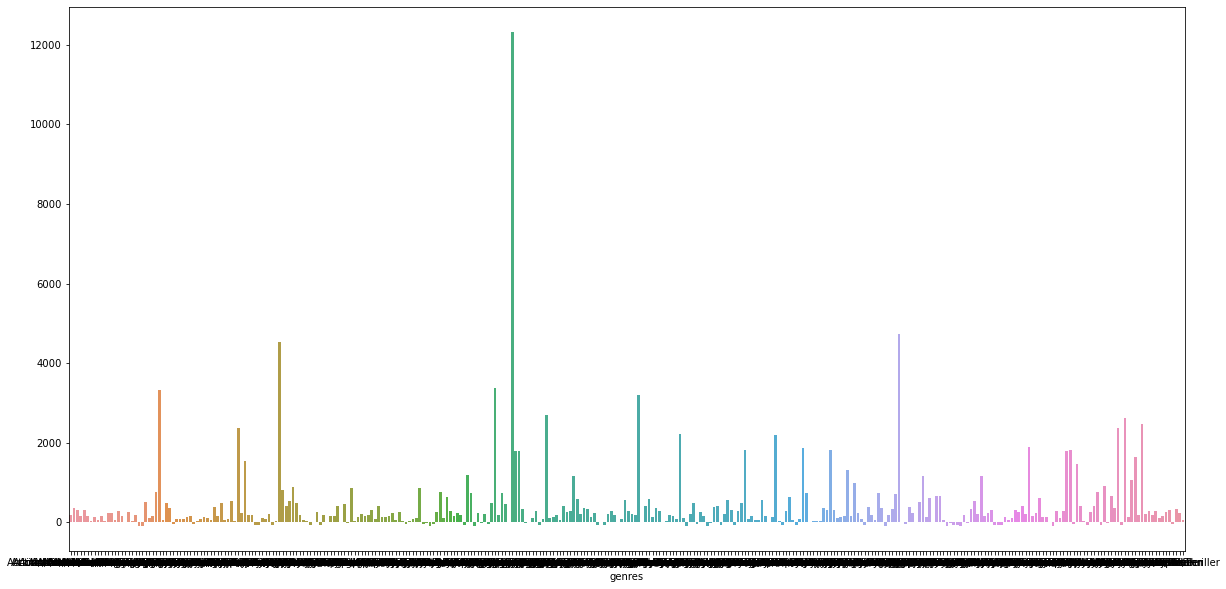

In [102]:
fig, ax =plt.subplots(figsize = (20,10))
sns.barplot(x=df4.index, y=df4.values)